In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('datos.txt', skiprows=4, sep='\s+')

In [3]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
0,02/02/2018,16:00,143,124,5.40,11.5,22.2,32,1001.9,0.0,196.5
1,02/02/2018,17:00,79,83,6.76,11.2,24.9,24,1002.3,0.0,224.0
2,02/02/2018,18:00,191,243,1.96,10.4,27.1,24,1002.2,0.0,317.8
3,02/02/2018,19:00,203,210,9.08,16.2,27.7,28,1001.4,0.0,320.3
4,02/02/2018,20:00,214,223,9.74,16.6,27.0,33,1000.5,0.0,256.7


In [4]:
df = pd.DataFrame(df0)

In [5]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR              int64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [6]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,143,124,5.40,11.5,22.2,32,1001.9,0.0,196.5,2018-02-02 16:00:00
1,79,83,6.76,11.2,24.9,24,1002.3,0.0,224.0,2018-02-02 17:00:00
2,191,243,1.96,10.4,27.1,24,1002.2,0.0,317.8,2018-02-02 18:00:00
3,203,210,9.08,16.2,27.7,28,1001.4,0.0,320.3,2018-02-02 19:00:00
4,214,223,9.74,16.6,27.0,33,1000.5,0.0,256.7,2018-02-02 20:00:00


In [8]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.000000
mean,155.398734,158.670886,6.902595,14.518987,21.113924,36.582278,997.608228,0.0,190.557595
std,87.758857,94.759060,4.083472,6.069797,7.172235,17.228777,2.092479,0.0,265.848698
min,6.000000,5.000000,0.390000,4.300000,8.500000,10.000000,993.200000,0.0,-1.000000
25%,68.250000,76.500000,4.070000,10.100000,14.425000,22.000000,995.900000,0.0,-1.000000
50%,173.500000,176.500000,5.905000,13.150000,21.450000,34.000000,997.500000,0.0,1.700000
75%,229.750000,240.000000,9.730000,18.625000,27.675000,48.500000,999.275000,0.0,336.800000
max,356.000000,354.000000,18.450000,31.000000,33.000000,78.000000,1002.300000,0.0,814.300000


In [9]:
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RAD-SOL,FECHA
1,79,83,6.76,11.2,24.9,24,1002.3,0.0,224.0,2018-02-02 17:00:00
34,245,247,11.40,19.1,24.1,38,996.3,0.0,-1.0,2018-02-04 02:00:00
58,258,260,14.97,24.5,24.6,25,996.1,0.0,-1.0,2018-02-05 02:00:00
104,221,217,11.01,22.0,24.3,28,997.0,0.0,1.0,2018-02-07 01:00:00


In [10]:
df.mean()

DIRS       155.398734
DIRR       158.670886
VELS         6.902595
VELR        14.518987
TEMP        21.113924
HR          36.582278
PB         997.608228
PREC         0.000000
RAD-SOL    190.557595
dtype: float64

In [11]:
df.TEMP.mean()

21.113924050632907

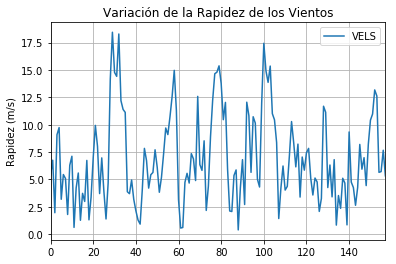

In [12]:
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

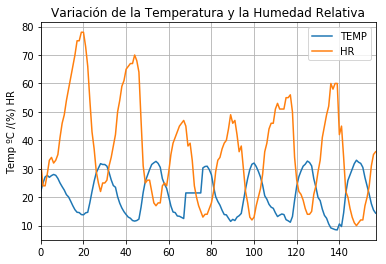

In [13]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

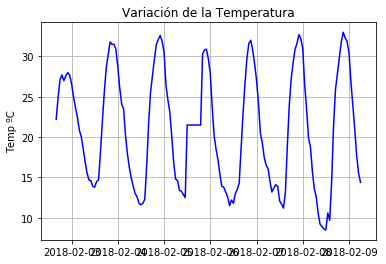

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

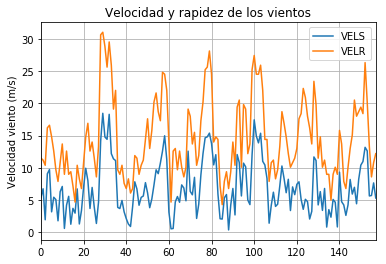

In [15]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Velocidad y rapidez de los vientos")
plt.ylabel("Velocidad viento (m/s)")
plt.grid(True)
plt.show()

In [16]:
df.TEMP.min()

8.5

In [17]:
df.TEMP.max()

33.0

In [18]:
temp=df.TEMP.max()-df.TEMP.min()

In [19]:
temp

24.5

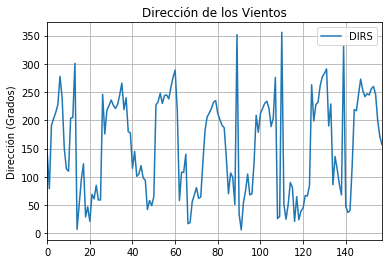

In [20]:
plt.figure(); df.DIRS.plot(); plt.legend(loc='best')
plt.title("Dirección de los Vientos")
plt.ylabel("Dirección (Grados)")
plt.grid(True)
plt.show()

In [21]:
df.rename(columns={'RAD-SOL':'RAD'},inplace=True)

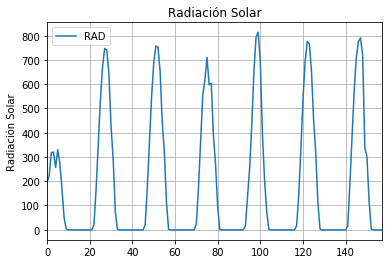

In [24]:
plt.figure(); df.RAD.plot(); plt.legend(loc='best')
plt.title("Radiación Solar")
plt.ylabel("Radiación Solar")
plt.grid(True)
plt.show()